In [2]:
import numpy as np
import pylab as pl
import networkx as nx

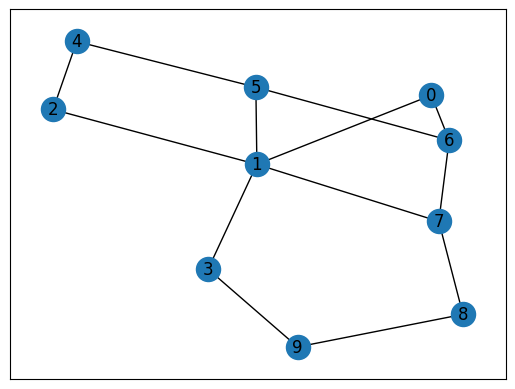

In [4]:
edges = [(0,1), (1,5), (5,6), (5,4), (1,2),
         (1,3), (9,3), (2,4), (0,6), (6,7),
         (8,9), (7,8), (1,7), (3,9)]

goal = 10
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
pl.show()

In [5]:
MATRIX_SIZE = 11
M = np.matrix(np.ones(shape =(MATRIX_SIZE, MATRIX_SIZE)))
M *= -1

for point in edges:
  print(point)
  if point[1] == goal:
    M[point] = 100
  else:
    M[point] = 0

  if point[0] == goal:
    M[point[::-1]] = 100
  else:
    M[point[::-1]]= 0
    # reverse of point

M[goal, goal]= 100
print(M)
# add goal point round trip

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(1, 3)
(9, 3)
(2, 4)
(0, 6)
(6, 7)
(8, 9)
(7, 8)
(1, 7)
(3, 9)
[[ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.   0.   0.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.]
 [ -1.  -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.   0.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. 100.]]


In [6]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))

gamma = 0.75
# learning parameter
initial_state = 1

#Determines the available for a given state
def available_actions(state):
  current_state_row = M[state, ]
  available_action = np.where(current_state_row >= 0)[1]
  return available_action

available_action = available_actions(initial_state)

#Choose one of the available action at random
def sample_next_action(available_actions_range):
  next_action = int(np.random.choice(available_action, 1))
  return next_action

action = sample_next_action(available_action)

def update(current_state, action, gamma):
  max_index = np.where(Q[action,] == np.max(Q[action, ]))[1]
  if max_index.shape[0] > 1:
    max_index = int(np.random.choice(max_index, size = 1))
  else:
    max_index = int(max_index)
  max_value = Q[action, max_index]
  Q[current_state, action] = M[current_state, action]+gamma*max_value
  if (np.max(Q) > 0):
    return(np.sum(Q / np.max(Q)*100))
  else:
    return(0)
#Updates the Q-MAtrix according to the patch chosen

update(initial_state, action, gamma)

0

Most Efficient Path
[0, 9, 9, 0, 1, 3, 7, 3, 5, 7, 2, 4, 8, 2, 3, 5, 4, 7, 2, 1, 8, 3, 1, 2, 10]


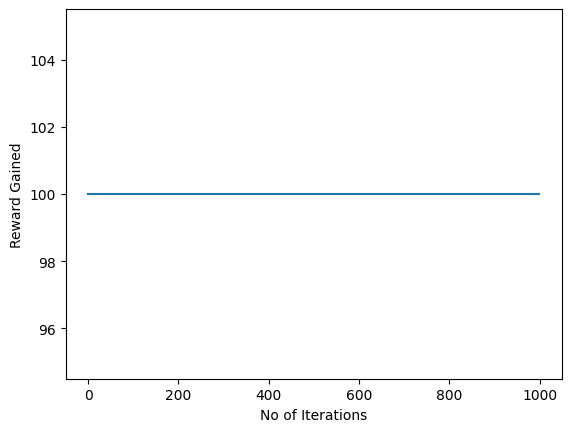

In [8]:
scores = []
for i in range(1000) :
  current_state = np.random.randint(0, int(Q.shape[0]))
  available_action = available_actions(current_state)
  action = sample_next_action(available_action)
  score = update(current_state, action, gamma)
  scores.append(score)

# print("Trained Q Matrix : ")
# print(Q / np.max(Q)*100)
# You can uncomment the above two lines to view the trained Q matrix

# Testing
current_state = 0
steps = [current_state]
while current_state != 10 :
  next_step_index = np.where(Q[current_state, ] == np.max(Q[current_state, ]))[1]
  if next_step_index.shape[0] > 1:
    next_step_index = int(np.random.choice(next_step_index, size = 1))
  else :
    next_step_index = int(next_step_index)
  steps.append(next_step_index)
  current_state = next_step_index

print("Most Efficient Path")
print(steps)

pl.plot(scores)
pl.xlabel('No of Iterations')
pl.ylabel('Reward Gained')
pl.show()

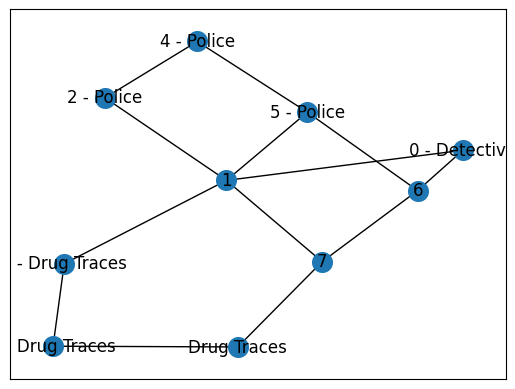

In [10]:
# Defining the Locations of The Polica and The Drug Traces
police = [2, 4, 5]
drug_traces = [3, 8, 9]

G = nx.Graph()
G.add_edges_from(edges)
mapping = {0 : '0 - Detective', 1 : '1', 2 : '2 - Police', 3 : '3 - Drug Traces',
           4 : '4 - Police', 5 : '5 - Police', 6 : '6', 7 : '7', 8 : 'Drug Traces',
           9 : '9 - Drug Traces', 10 : '10 - Drug Racket Location'}

H = nx.relabel_nodes(G, mapping)
pos = nx.spring_layout(H)
nx.draw_networkx_nodes(H, pos, node_size = [200])
nx.draw_networkx_edges(H, pos)
nx.draw_networkx_labels(H, pos)
pl.show()

In [17]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
env_police = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
env_drugs = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
initial_stage = 1

# Same as Above
def available_actions(state):
  current_state_row = M [state, ]
  av_action = np.where(current_state_row >= 0)[1]
  return av_action

# Same as Above
def sample_next_action(available_actions_range):
  next_action = int(np.random.choice(available_action, 1))
  return next_action

# Exploring the Environment
def collect_environmental_data(action):
  found = []
  if action in police :
    found.append('p')
  if action in drug_traces :
    found.append('d')
  return (found)

available_action = available_actions(initial_state)
action = sample_next_action(available_action)

def update(current_state, action, gamma):
  max_index = np.where(Q[action, ] == np.max(Q[action, ]))[1]
  if max_index.shape[0] > 1:
    max_index = int(np.random.choice(max_index, size = 1))
  else :
    max_index = int(max_index)
  max_value = Q[action, max_index]
  Q[current_state, action] = M[current_state, action] + gamma * max_value
  environment = collect_environmental_data(action)
  if 'p' in environment :
    env_police[current_state, action] += 1
  if 'd' in environment :
    env_drugs[current_state, action] += 1
  if (np.max(Q) > 0):
    return (np.sum(Q/ np.max(Q) * 100))
  else :
    return (0)

# Same as Above
update(initial_state, action, gamma)
def available_actions_with_env_help(state):
  current_state_row = M[state, ]
  av_action = np.where(current_state_row >= 0)[1]

  # If There Are Multiple Routes, Dis-Favor Anything Negative
  env_pos_row = env_matrix_snap[state, av_action]

  if (np.sum(env_pos_row < 0)):
    # Can We Remove the Negative Directions from av_act?
    temp_av_action = av_action[np.array(env_pos_row)[0] >= 0]
    if len(temp_av_action) > 0:
      av_action = temp_av_action
    return av_action
# Determines the Available Actions According to the Environment

In [19]:
scores = []
for i in range(1000):
  current_state = np.random.randint(0, int(Q.shape[0]))
  available_action = available_actions(current_state)
  action = sample_next_action(available_action)
  score = update(current_state, action, gamma)

# Print Environmental Matrices
print('Police Found')
print(env_police)
print(' ')
print('Drug Traces Found')
print(env_drugs)

Police Found
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 41.  0.  0. 34.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 86.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 96.  0.  0. 97.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 62.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 60.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
 
Drug Traces Found
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 43.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 97.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 63.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 80.  0.]
 [ 0.  0.  0. 85.  0.  0. 